In [188]:
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, cheby1, filtfilt

matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.figsize'] = 15, 5

In [184]:
def butter_bund_filter(lowcut, highcut, fs, order=5, btype='band'):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype=btype)
    return b, a

def butter_filter(fcut, fs, order=5, btype='band'):
    nyq = 0.5 * fs
    f = fcut / nyq
    b, a = butter(order, f, btype=btype)
    return b, a

def plot_filter(b, a, SAMPLE_RATE):
    w, h = freqz(b, a, worN=2000)
    plt.plot((SAMPLE_RATE * 0.5 / np.pi) * w, abs(h))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.show()
    
def cheby1_bund_filter(lowcut, highcut, fs, order=10, btype='band'):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = cheby1(order, Apass, [low, high], btype=btype)
    return b, a

def cheby1_filter(fcut, fs, order=10, btype='lp'):
    Apass = 0.01  # dB
    wn = fcut / (0.5*fs)
    b, a = cheby1(order, Apass, wn, btype=btype)
    return b, a


def plot_cheby1_filter(b, a, SAMPLE_RATE):
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5*SAMPLE_RATE*w/np.pi, 20*np.log10(np.abs(h)))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.show()

In [195]:
def spectra(signal, sample_rate, duration, plot_spectra=False, plot_phase=False, plot_input=False, title=None):
    _spectra = np.fft.fft(signal) / len(signal)
    
    middle_index = int(len(_spectra)/2)
    
    _phase = np.angle(_spectra[:middle_index])
    _spectra = abs(_spectra[:middle_index])
    
    _time =  np.fft.fftfreq(int(sample_rate * duration), 1/sample_rate)[:middle_index]
    
    if plot_input:
        plt.plot(np.linspace(0, duration, duration * sample_rate), signal)
        plt.xlabel("Time, sec")
        plt.ylabel("Value")
        if title is not None:
            plt.title(title)
        plt.show()
    
    if plot_spectra:
        plt.stem(_time, _spectra)
        plt.xlabel("Frequency, Hz")
        plt.ylabel("Amplitude")
        if title is not None:
            plt.title(title)
        plt.show()
    
    if plot_phase:
        plt.stem(_time, _phase)
        plt.xlabel("Frequency, Hz")
        plt.ylabel("Phase")
        if title is not None:
            plt.title(title)
        plt.show()

## 1. 
Сформувати вектор відліків часу тривалістю 5 с для частоти дискретизації 128
Гц. Сформувати прямокутний імпульс в момент часу 3 с тривалості 0.1 с амплітуди 1 В.
Додати до сигналу випадковий шумовий сигнал із нульовим середнім значенням
амплітуди 0.5 В. Спроектувати ФНЧ Батерворта для позбавлення сигналу від шуму
(функції buttord, butter, lfilter).

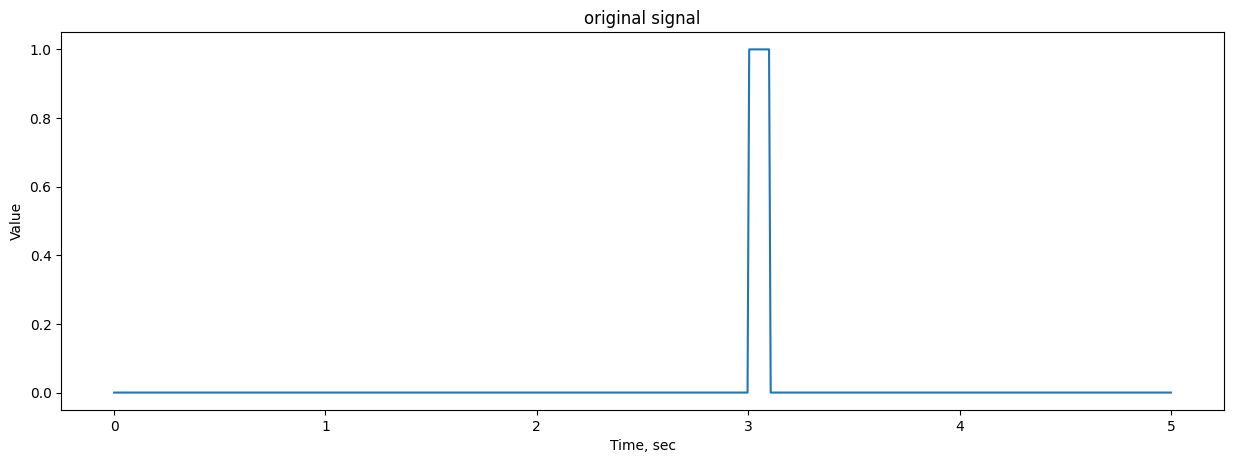

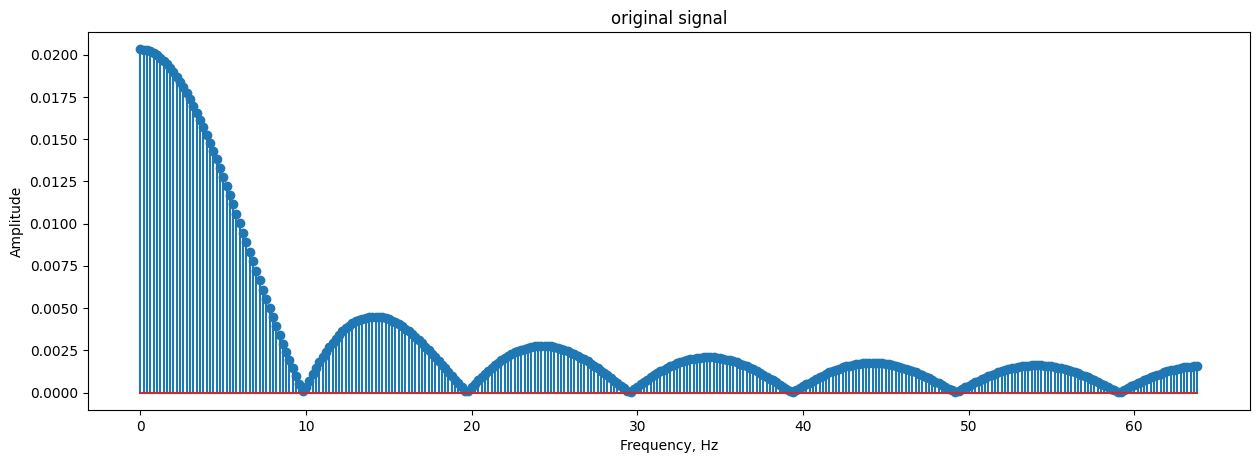

In [135]:
SAMPLE_RATE = 128
DURATION = 5

time_line = np.linspace(0, DURATION, DURATION * SAMPLE_RATE)

# прямокутний імпульс в момент часу 3 с тривалості 0.1 с амплітуди 1 В
rec_1 = np.zeros((SAMPLE_RATE * DURATION))
rec_1[SAMPLE_RATE*3:round(SAMPLE_RATE*3 + SAMPLE_RATE*0.1)] = rec_1[SAMPLE_RATE*3:round(SAMPLE_RATE*3 + SAMPLE_RATE*0.1)] + 1

# noise
rand_sig = np.random.uniform(-0.5, 0.5, size=(SAMPLE_RATE*DURATION))

# sig + noise
noised_sig = rec_1 + rand_sig

# графік початкового сигналу та його амплітудного спектру
spectra(rec_1, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='original signal')

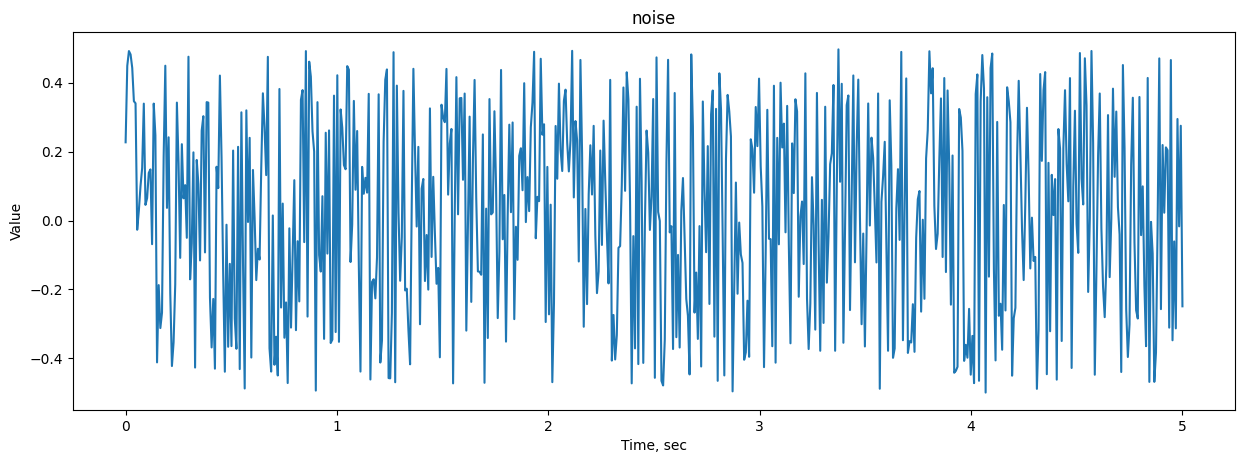

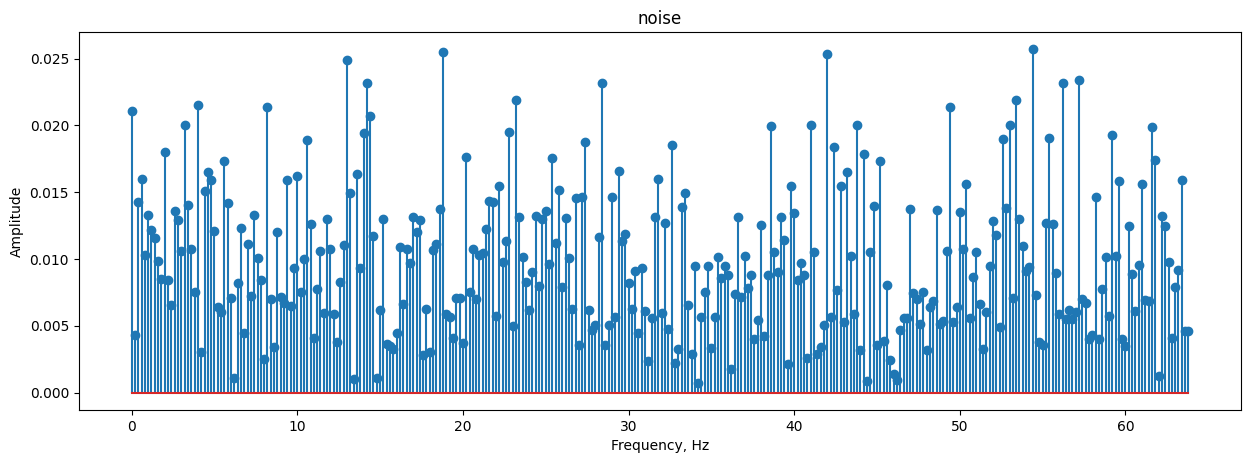

In [136]:
# графік шуму та його амплітудного спектру
spectra(rand_sig, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noise')

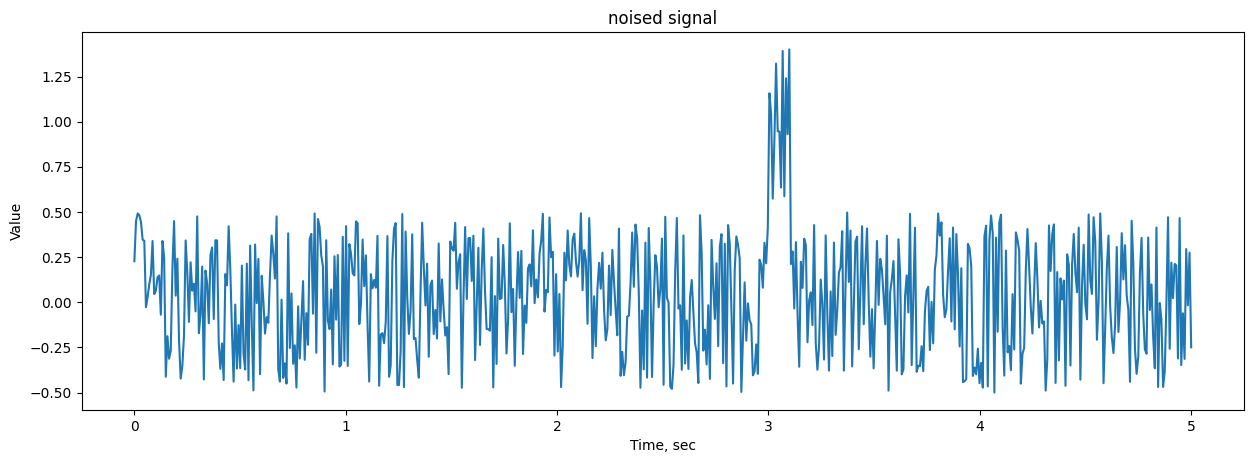

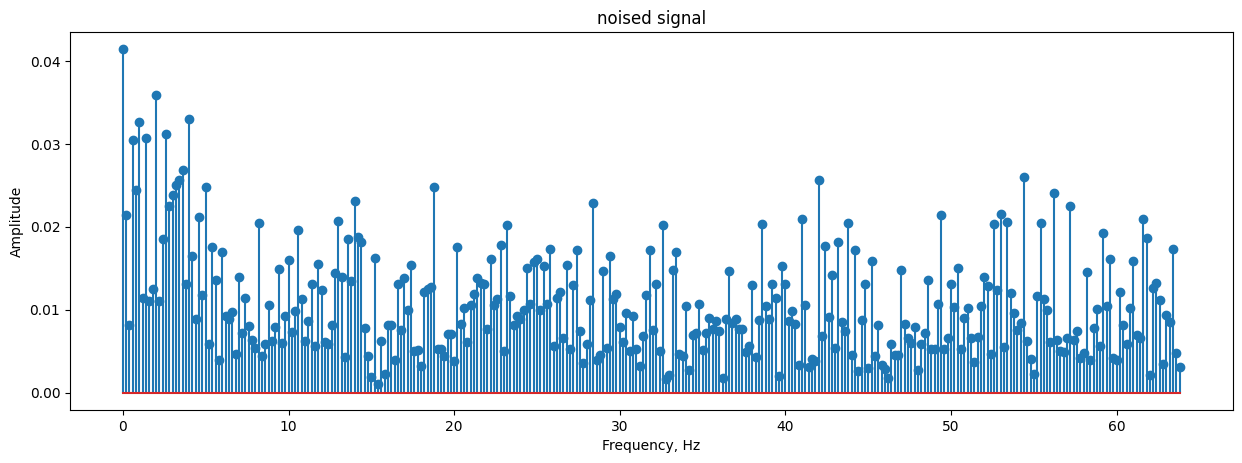

In [137]:
# графік зашумленого сигналу (вхідного сигналу фільтра) та його амплітудного спектру
spectra(noised_sig, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noised signal')

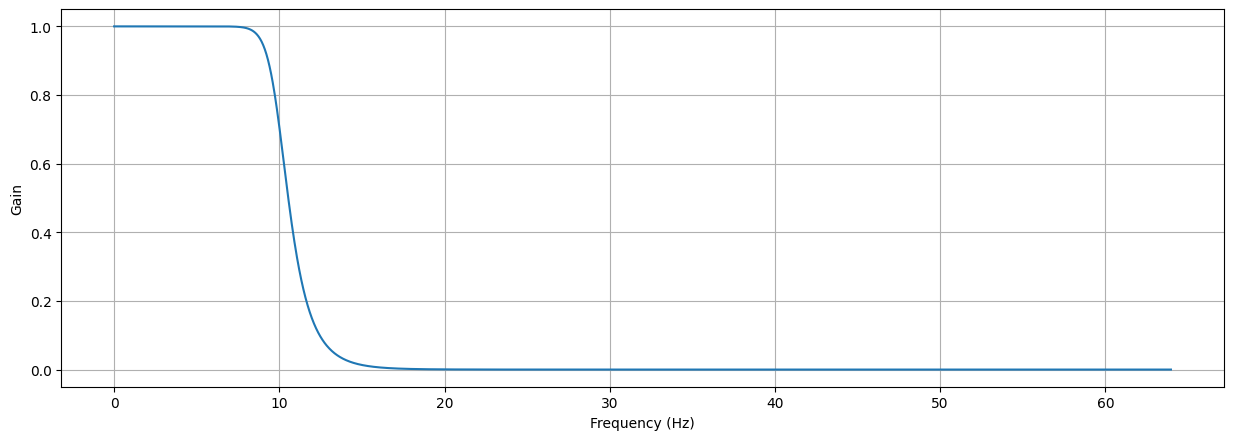

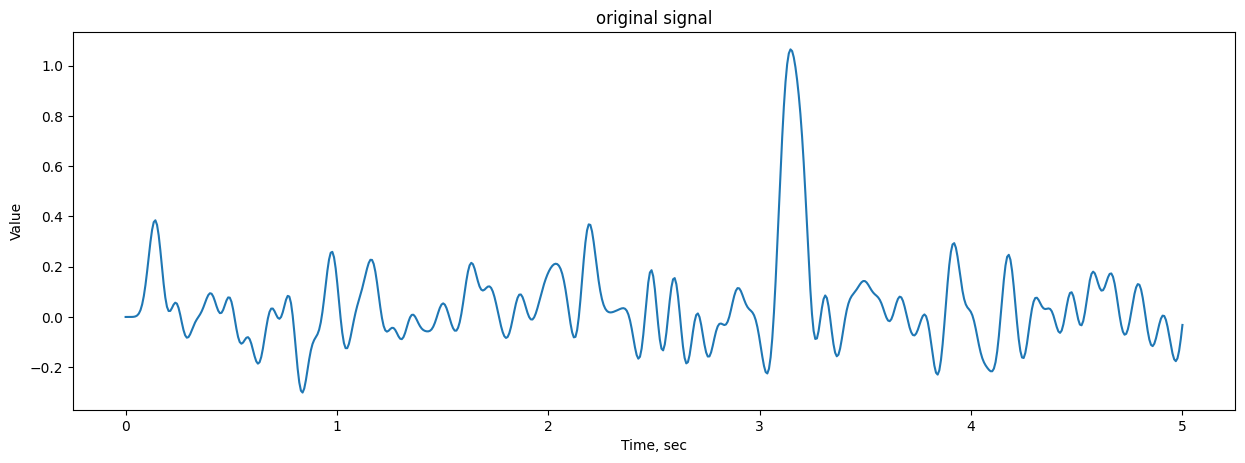

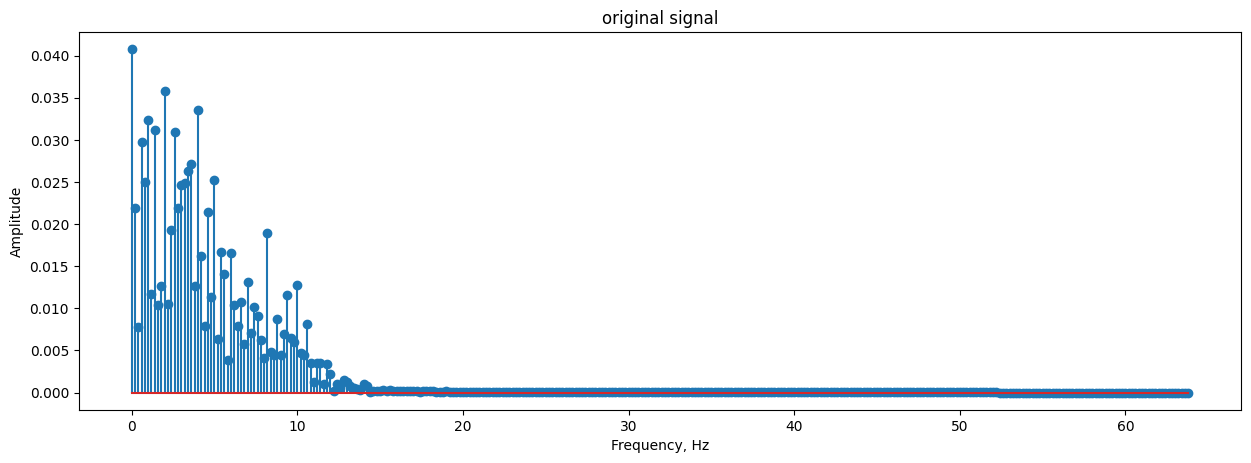

In [140]:
def butter_filter(fcut, fs, order=5, btype='band'):
    nyq = 0.5 * fs
    f = fcut / nyq
    b, a = butter(order, f, btype=btype)
    return b, a

def plot_filter(b, a, SAMPLE_RATE):
    w, h = freqz(b, a, worN=2000)
    plt.plot((SAMPLE_RATE * 0.5 / np.pi) * w, abs(h))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.show()

cut = 10

b, a = butter_filter(cut, SAMPLE_RATE, order=10, btype='lp')
plot_filter(b, a)
y = lfilter(b, a, noised_sig)

spectra(y, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='original signal')

## 2. 
Сформувати вектор відліків часу тривалістю 1 с для частоти дискретизації 128
Гц. Сформувати сигнали ділянки синусоїди частотою 10 Гц амплітуди 1 В. Додати
випадковий сигнал з нульовим середнім значенням амплітуди 2 В. Спроектувати ФНЧ,
ФВЧ та СФ Чебишова І роду для позбавлення сигналу від шуму (cheb1ord, cheby1).

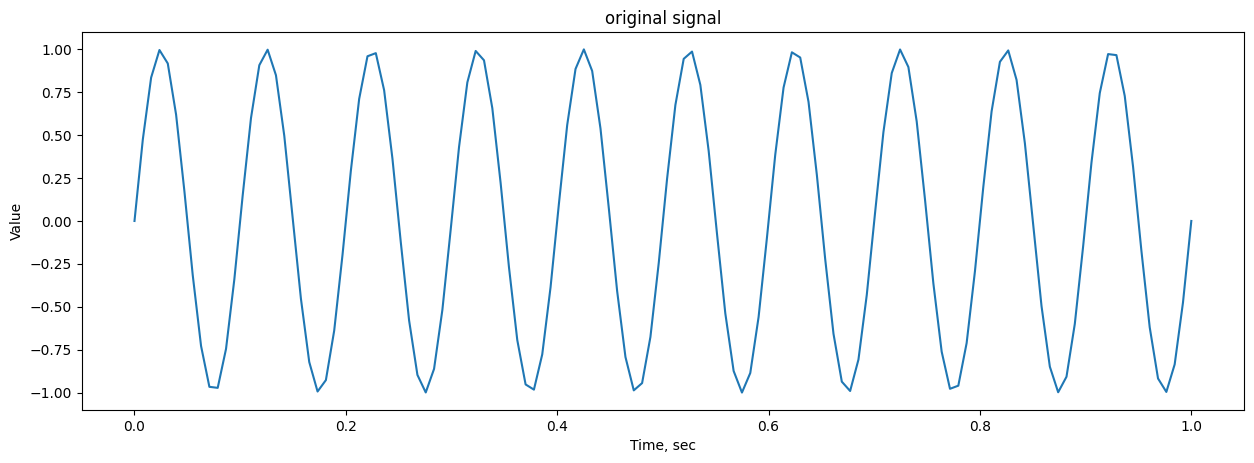

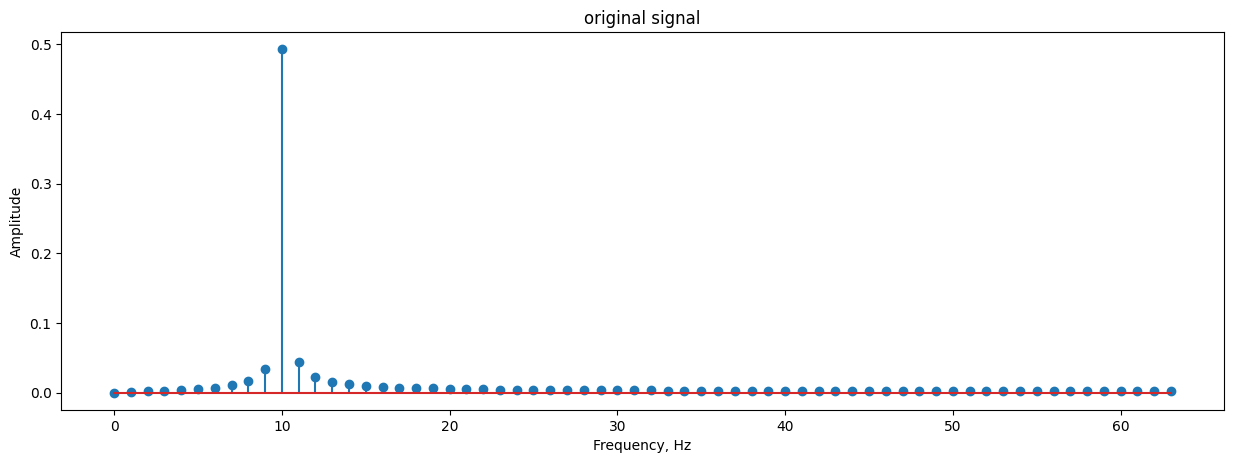

In [170]:
SAMPLE_RATE = 128
DURATION = 1

time_line = np.linspace(0, DURATION, DURATION * SAMPLE_RATE)

sin_10 = np.sin(10*2*np.pi*time_line)

# noise
rand_sig = np.random.uniform(-2, 2, size=(SAMPLE_RATE*DURATION))

# sig + noise
noised_sig = sin_10 + rand_sig

# графік початкового сигналу та його амплітудного спектру
spectra(sin_10, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='original signal')

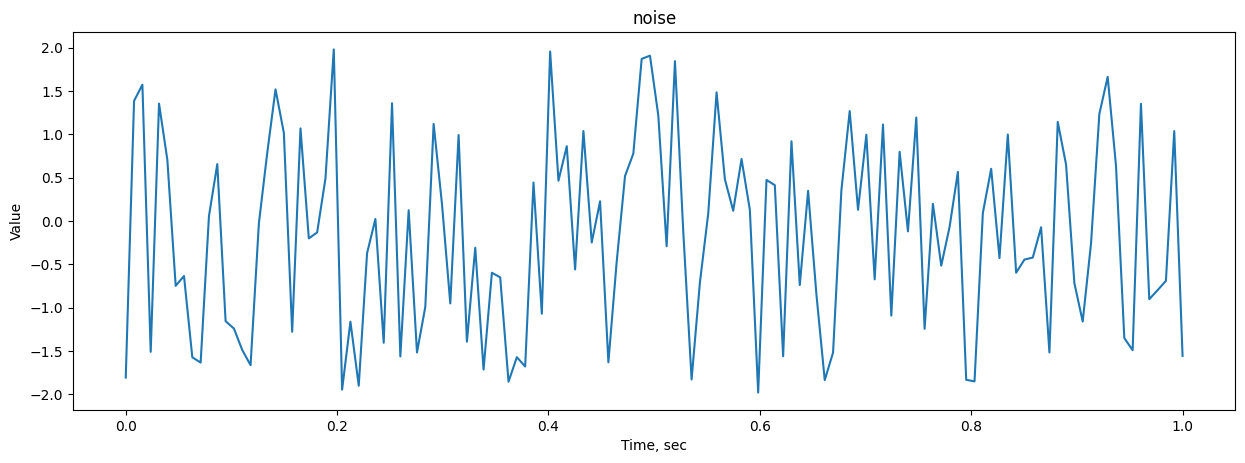

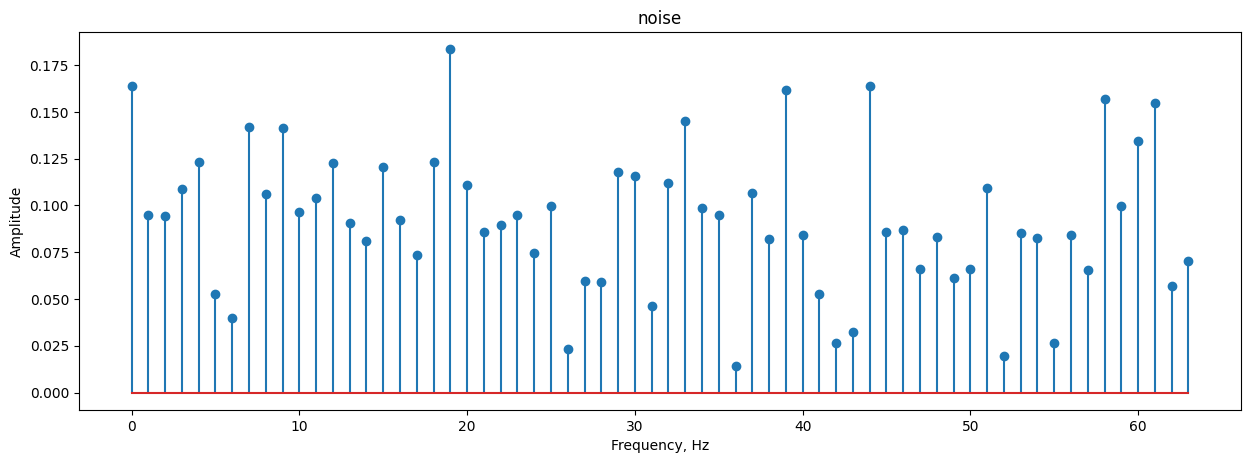

In [171]:
# графік шуму та його амплітудного спектру
spectra(rand_sig, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noise')

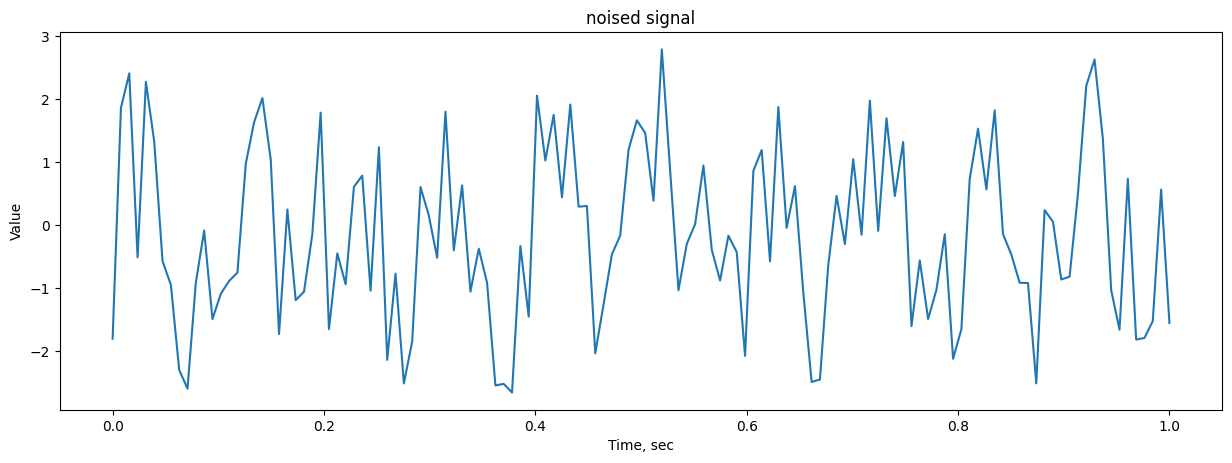

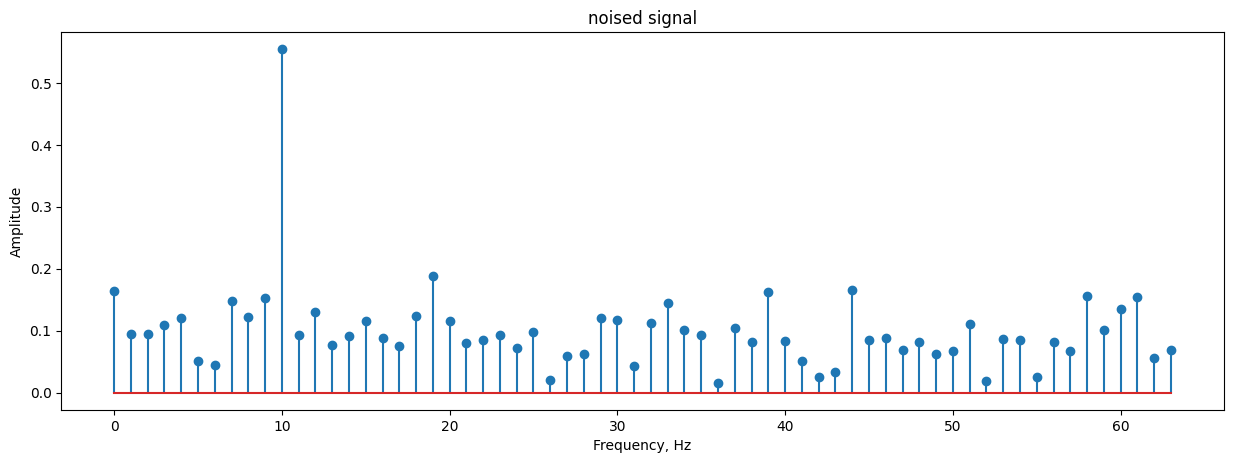

In [172]:
# графік зашумленого сигналу (вхідного сигналу фільтра) та його амплітудного спектру
spectra(noised_sig, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noised signal')

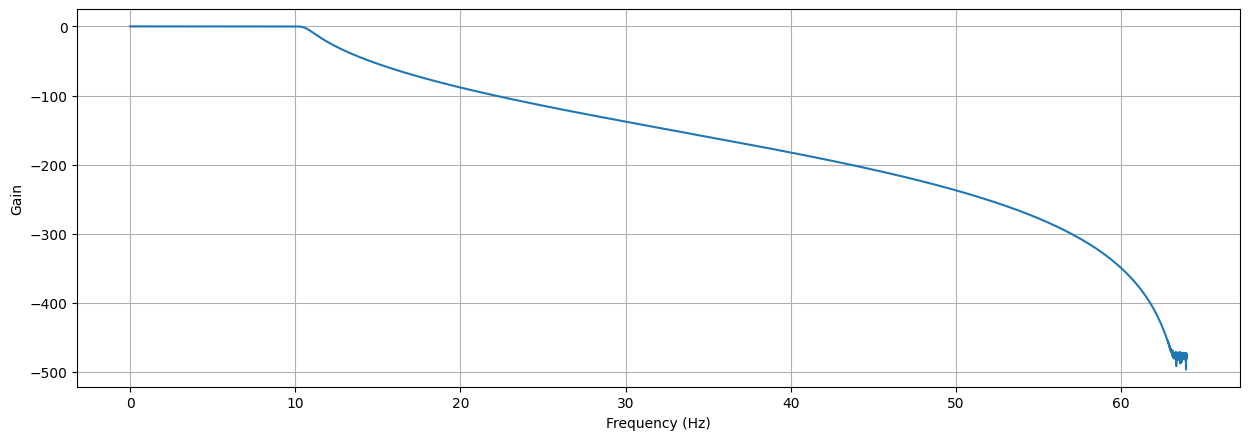

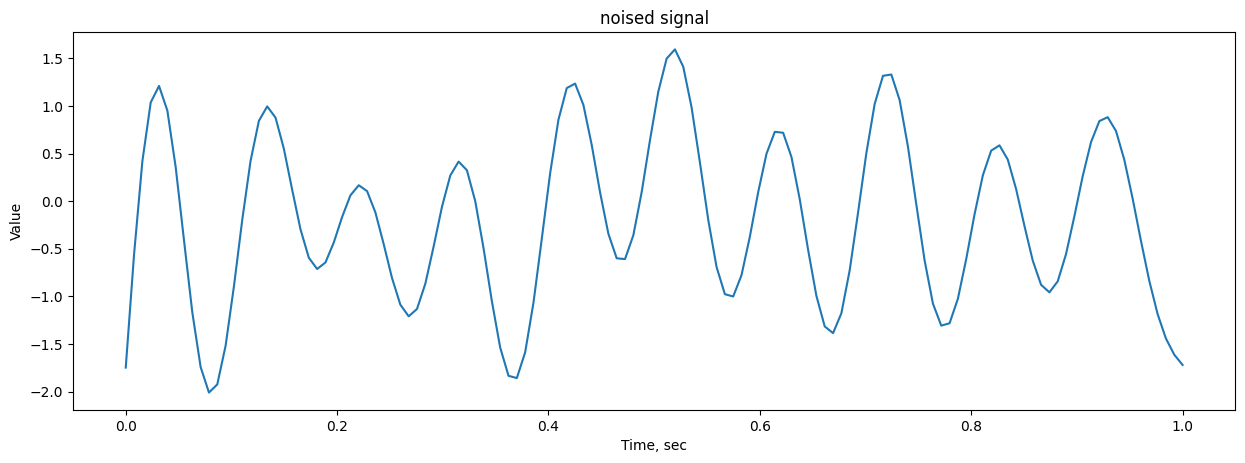

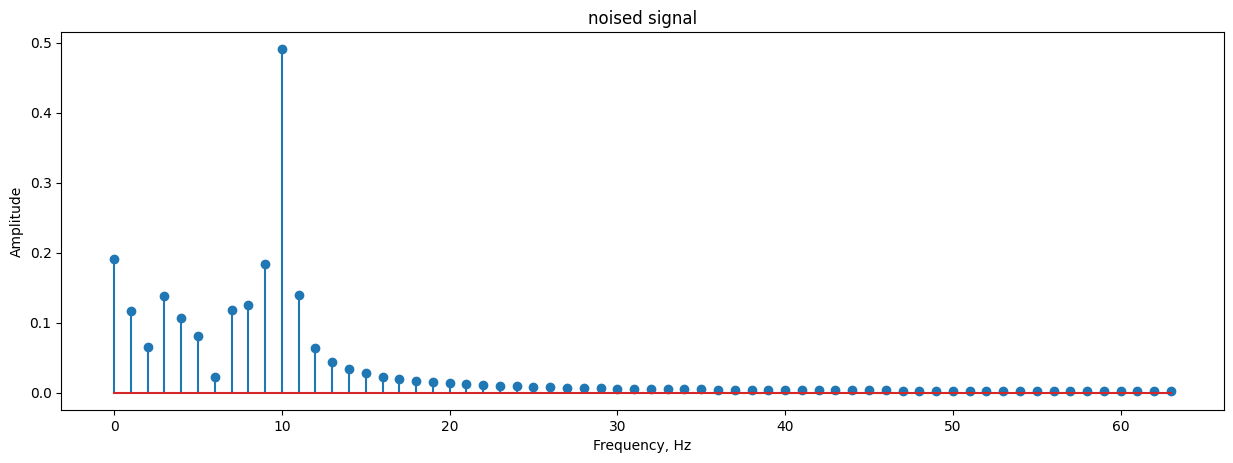

In [190]:
def plot_cheby1_filter(b, a, SAMPLE_RATE):
    w, h = freqz(b, a, worN=8000)
    plt.plot(0.5*SAMPLE_RATE*w/np.pi, 20*np.log10(np.abs(h)))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.show()

def cheby1_filter(fcut, fs, order=10, btype='lp'):
    Apass = 0.01  # dB
    wn = fcut / (0.5*fs)
    b, a = cheby1(order, Apass, wn, btype=btype)
    return b, a

# ФНЧ
b, a = cheby1_filter(10, SAMPLE_RATE, order=10, btype='lp')

plot_cheby1_filter(b, a, SAMPLE_RATE)

y = filtfilt(b, a, noised_sig)

spectra(y, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noised signal')

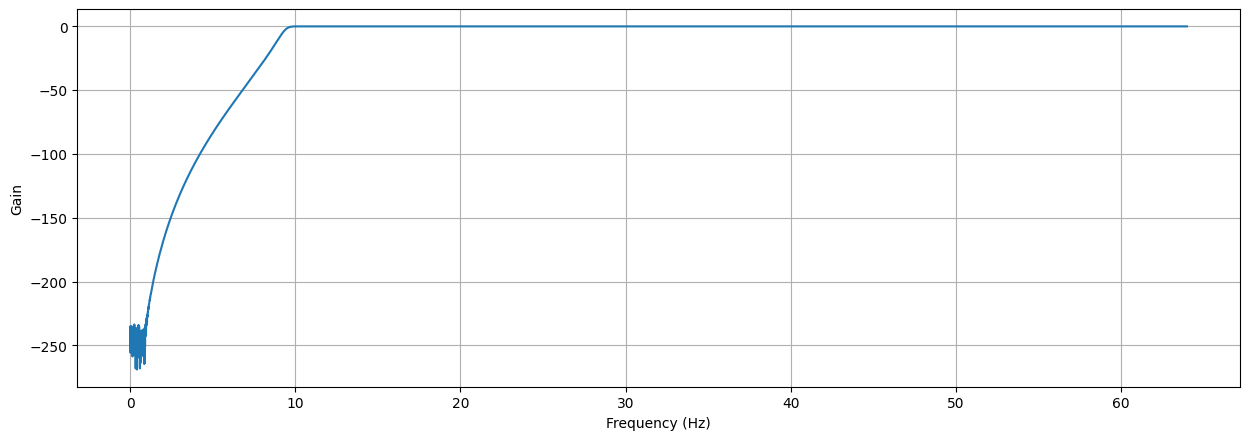

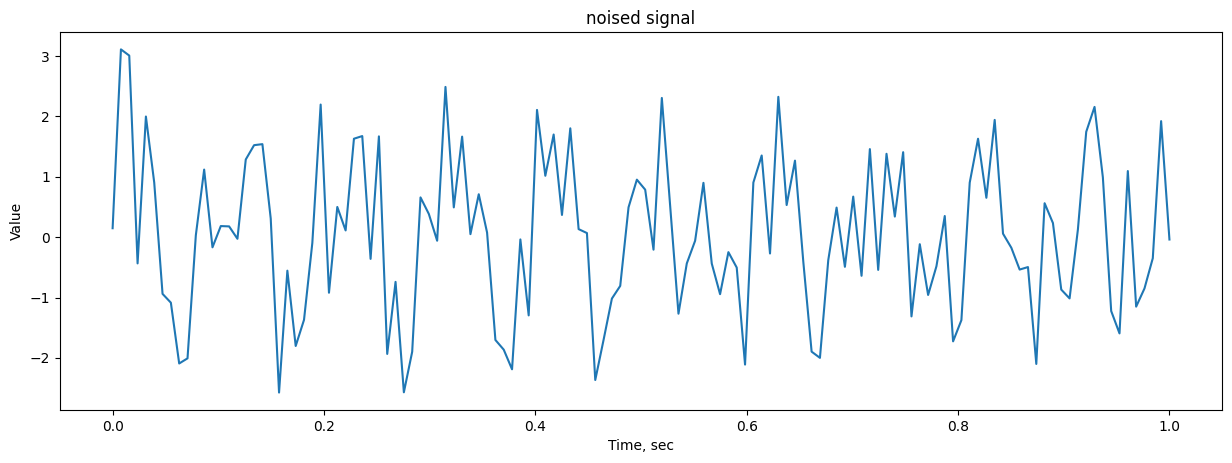

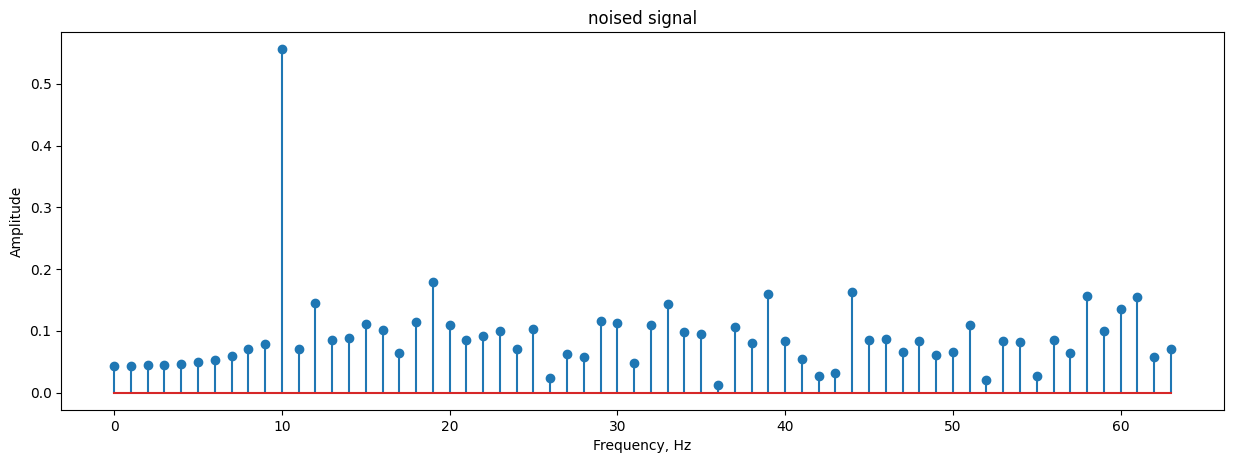

In [191]:
# ФВЧ
b, a = cheby1_filter(10, SAMPLE_RATE, order=10, btype='lp')
b, a = cheby1_filter(10, SAMPLE_RATE, order=10, btype='hp')

plot_cheby1_filter(b, a, SAMPLE_RATE)

y = filtfilt(b, a, noised_sig)

spectra(y, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noised signal')

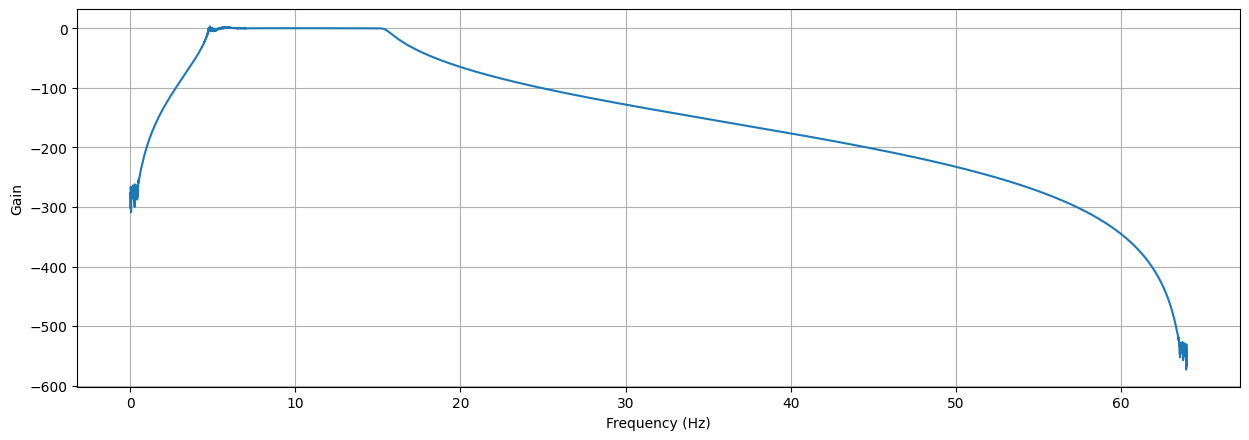

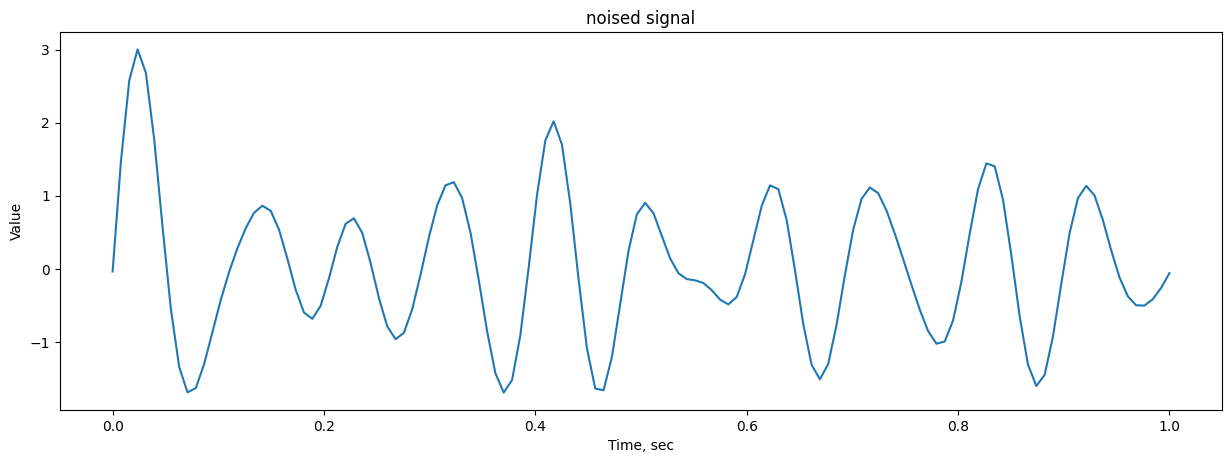

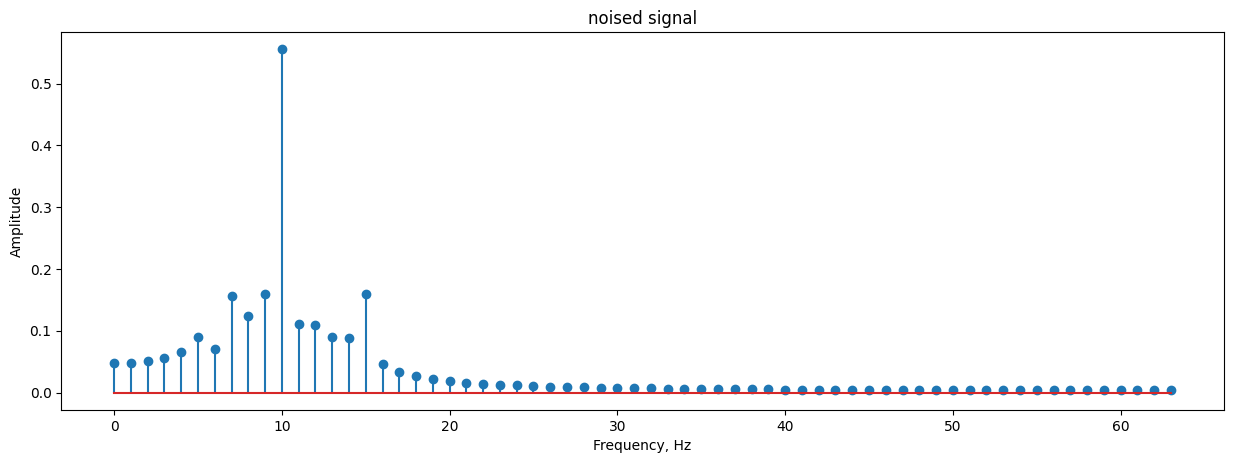

In [194]:
# СФ
b, a = cheby1_bund_filter(5, 15, SAMPLE_RATE, order=10, btype='bandpass')

plot_cheby1_filter(b, a, SAMPLE_RATE)

y = filtfilt(b, a, noised_sig)

spectra(y, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noised signal')

## 3. 
Сформувати вектор відліків часу тривалістю 10 с для частоти дискретизації 128
Гц. Сформувати випадковий сигнал амплітуди 10 мВ з нульовим середнім значенням,
який зашумлений мережевою перешкодою частоти 50 Гц амплітуди 1 В. Спроектувати ЗФ
Батерворта для позбавлення сигналу від перешкоди.

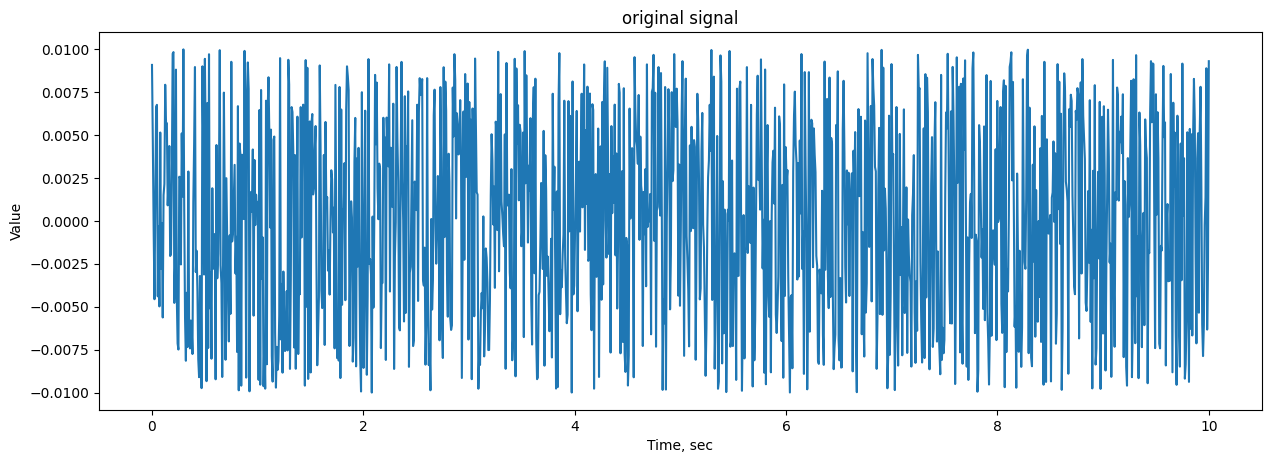

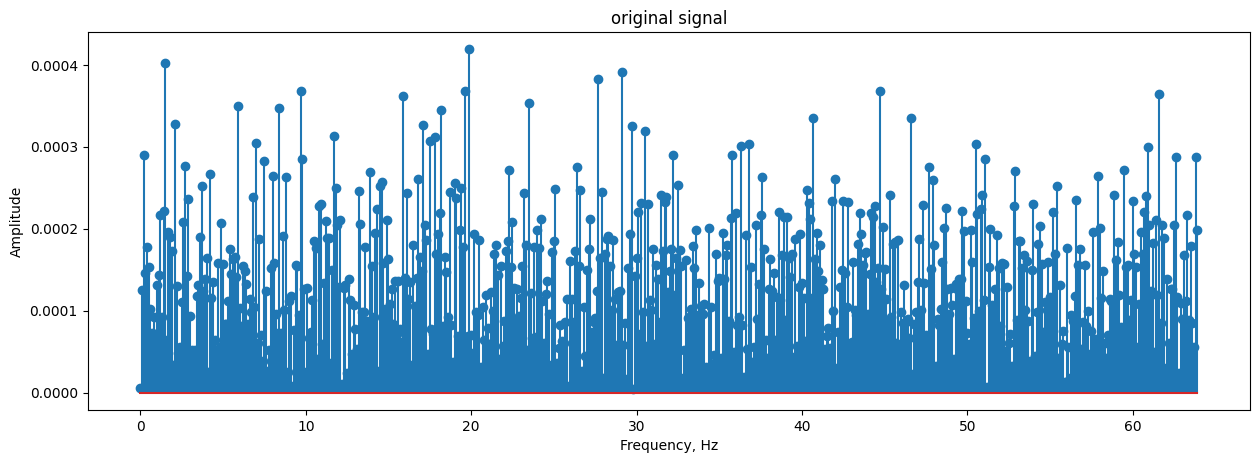

In [115]:
SAMPLE_RATE = 128
DURATION = 10

time_line = np.linspace(0, DURATION, DURATION * SAMPLE_RATE)

# required signal
rand_sig = np.random.uniform(-0.01, 0.01, size=(SAMPLE_RATE*DURATION))

# noise
sin_50 = np.sin(50*2*np.pi*time_line)

# sig + noise
noised_sig = sin_50 + rand_sig

# графік початкового сигналу та його амплітудного спектру
spectra(rand_sig, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='original signal')

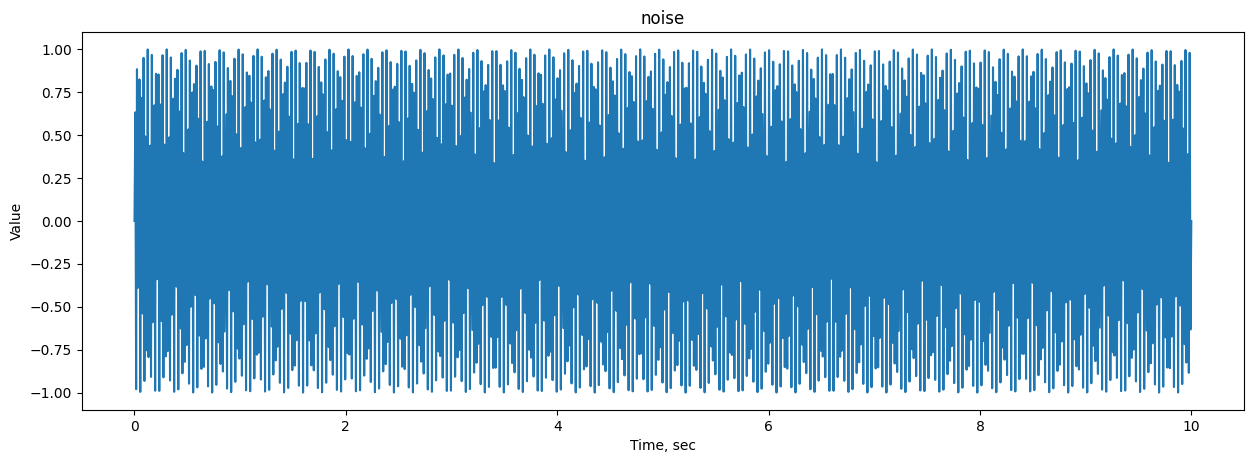

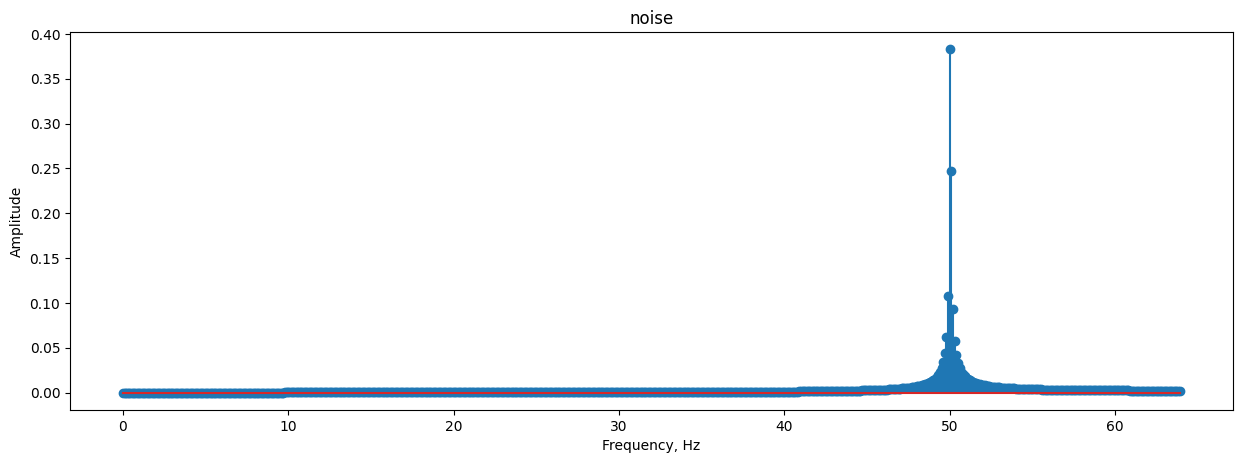

In [116]:
# графік шуму та його амплітудного спектру
spectra(sin_50, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noise')

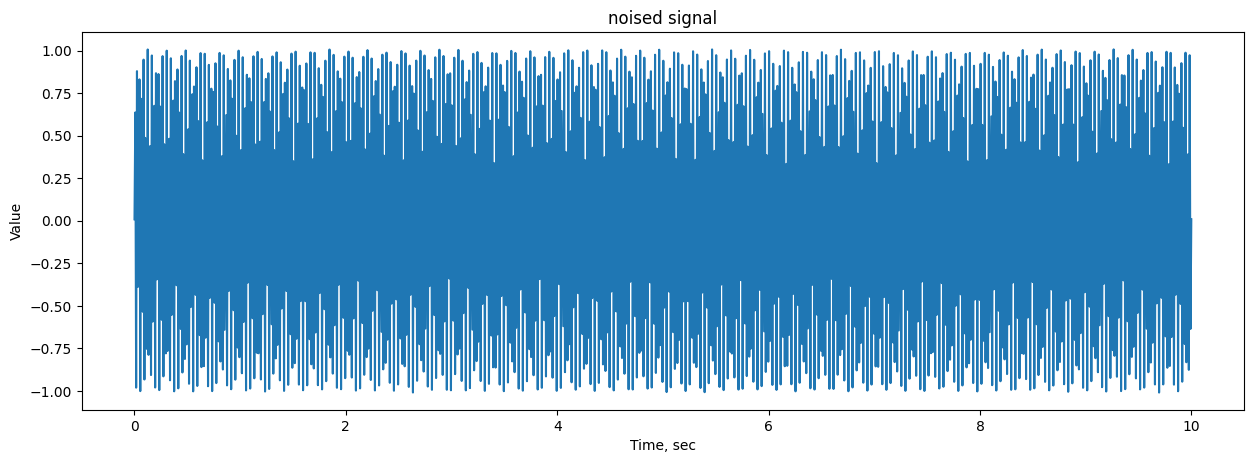

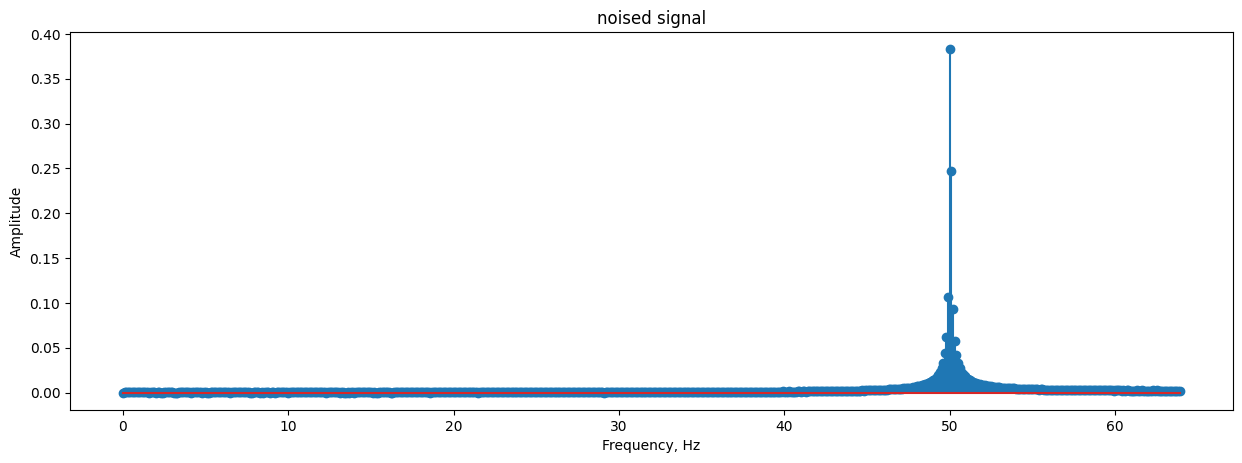

In [117]:
# графік зашумленого сигналу (вхідного сигналу фільтра) та його амплітудного спектру
spectra(noised_sig, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='noised signal')

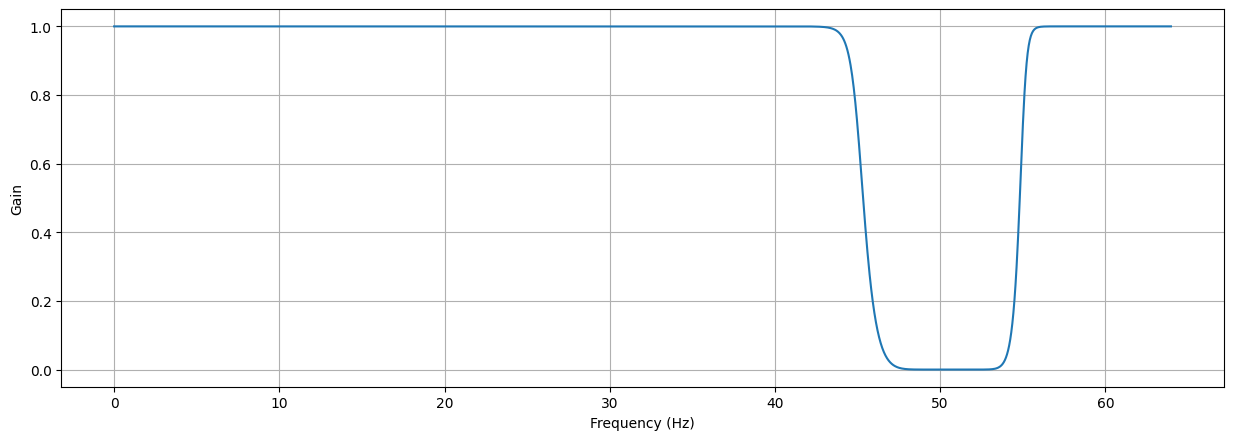

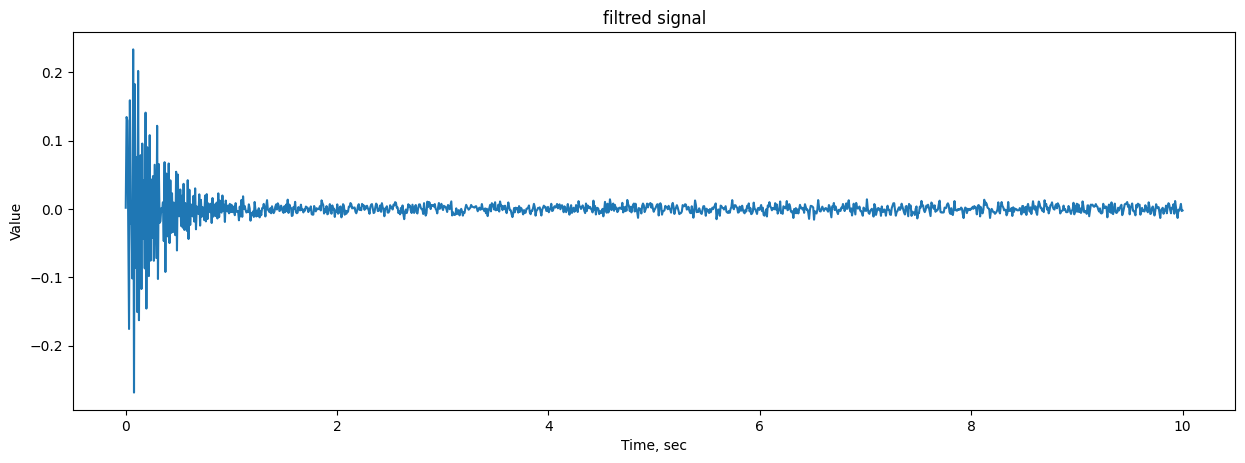

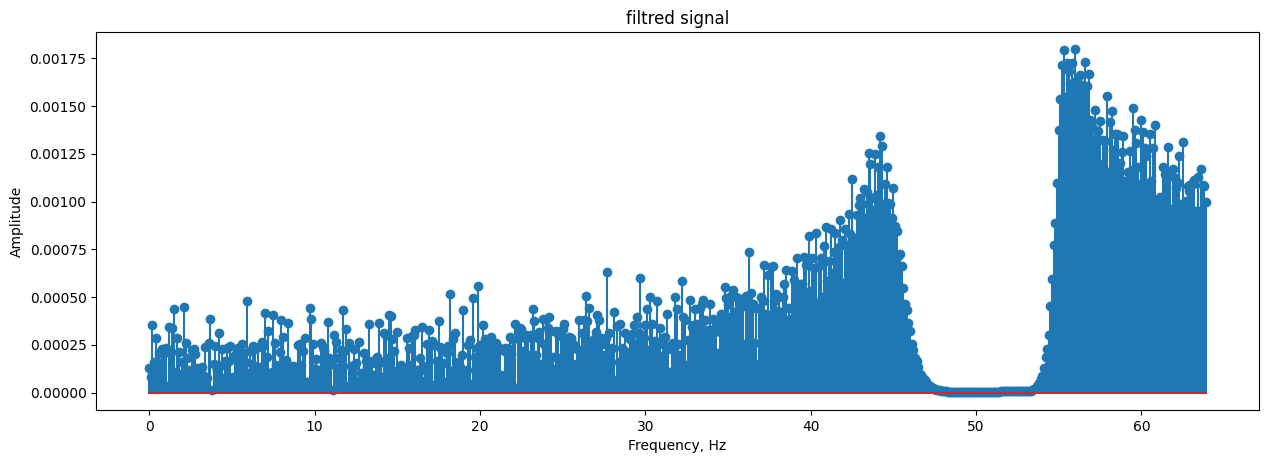

In [118]:
lowcut = 45
highcut = 55

def butter_filter(fcut, fs, order=5, btype='band'):
    nyq = 0.5 * fs
    f = fcut / nyq
    b, a = butter(order, f, btype=btype)
    return b, a

b, a = butter_filter(lowcut, highcut, SAMPLE_RATE, order=10, btype='bandstop')
plot_filter(b, a)

y = lfilter(b, a, noised_sig)

spectra(y, sample_rate=SAMPLE_RATE, duration=DURATION, plot_spectra=True, plot_input=True, title='filtred signal')

## 4. 
Для звукових сигналів, які отримані з різною частотою дискретизації, виконати
допомогою фільтрів розділення на три спектральні діапазони: до 450 Гц; від 450 Гц до 1
кГц; від 1 кГц до 4 кГц. Прослухати отримані сигнали, зробити висновки.

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write, read

fs = 44000  # Sample rate
seconds = 10  # Duration of recording

my_recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished
write('./44kHz.wav', fs, my_recording)  # Save as WAV file

In [210]:
from playsound import playsound

path_8kHz = "./8kHz.wav"
path_44kHz = "./44kHz.wav"

playsound(path_8kHz)
playsound(path_44kHz)

KeyboardInterrupt: 

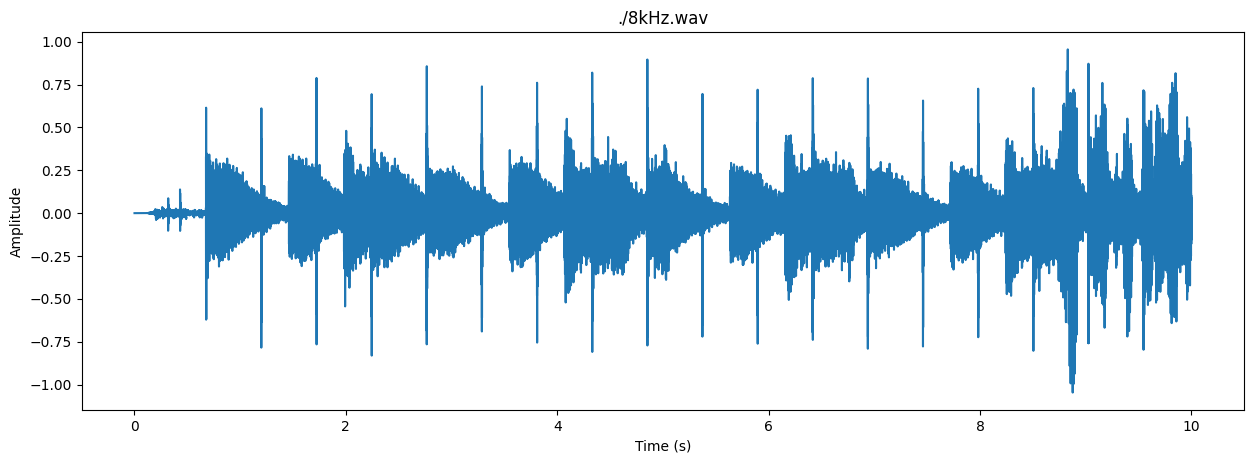

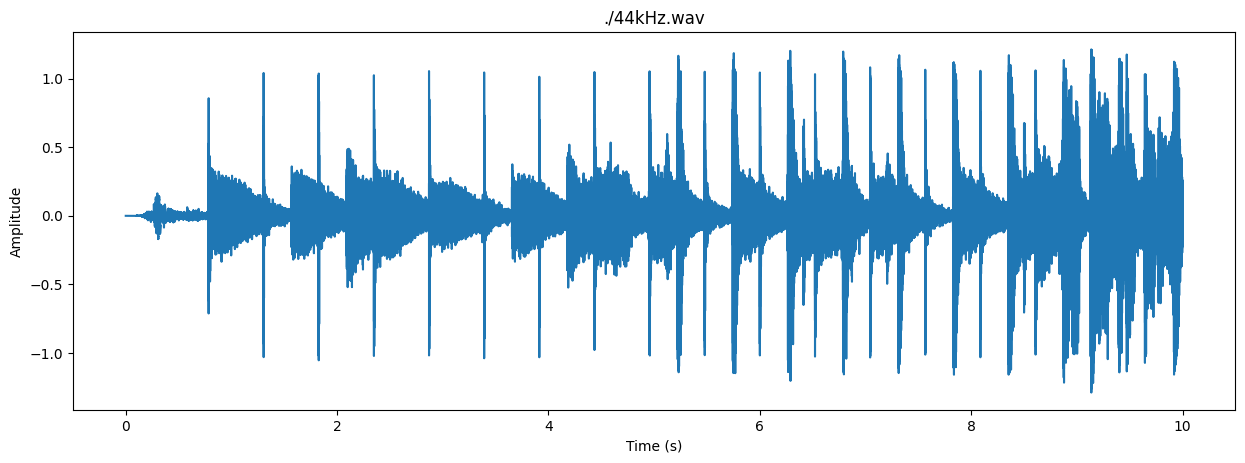

In [215]:
def signal_duration_from_frequency(number_of_data_records, discretization_frequency):
    """
    Returns time in seconds
    """
    return number_of_data_records / discretization_frequency


def load_audio(path):
    input_data = read(path)
    
    # Використовуємо одну з двох частин стерео сигналу
    audio = input_data[1][:, 0]
    time_line = np.linspace(0, len(audio) / input_data[0], num=len(audio))

    # Рахуємо тривалість сигналу
    duration = signal_duration_from_frequency(len(audio), discretization_frequency=input_data[0])

    plt.plot(time_line, audio)
    plt.ylabel("Amplitude")
    plt.xlabel("Time (s)")
    plt.title(path)
    plt.show()
    
    return duration, audio
    
audio_8_duration, audio_8 = load_audio(path_8kHz)
audio_44_duration, audio_44 = load_audio(path_44kHz)

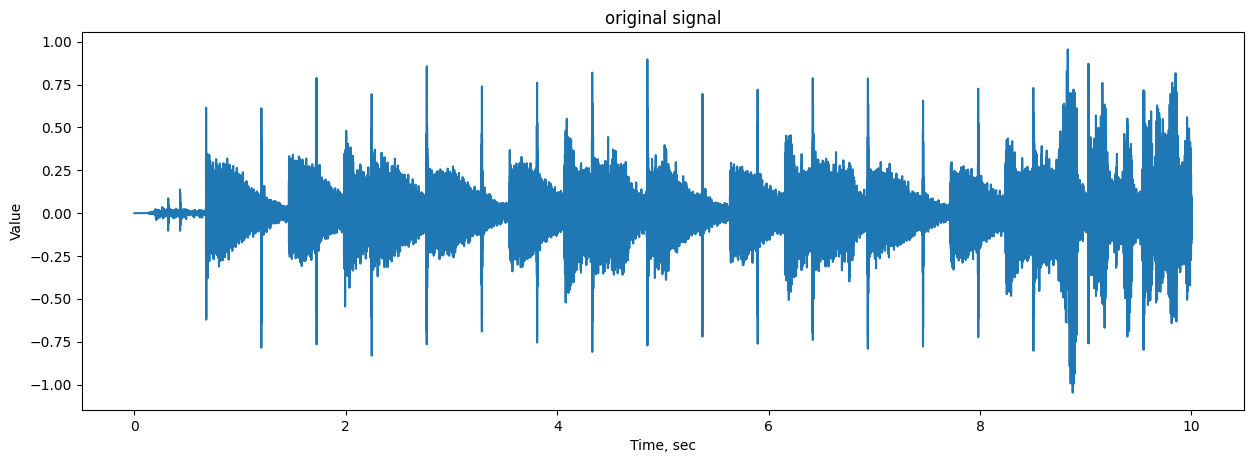

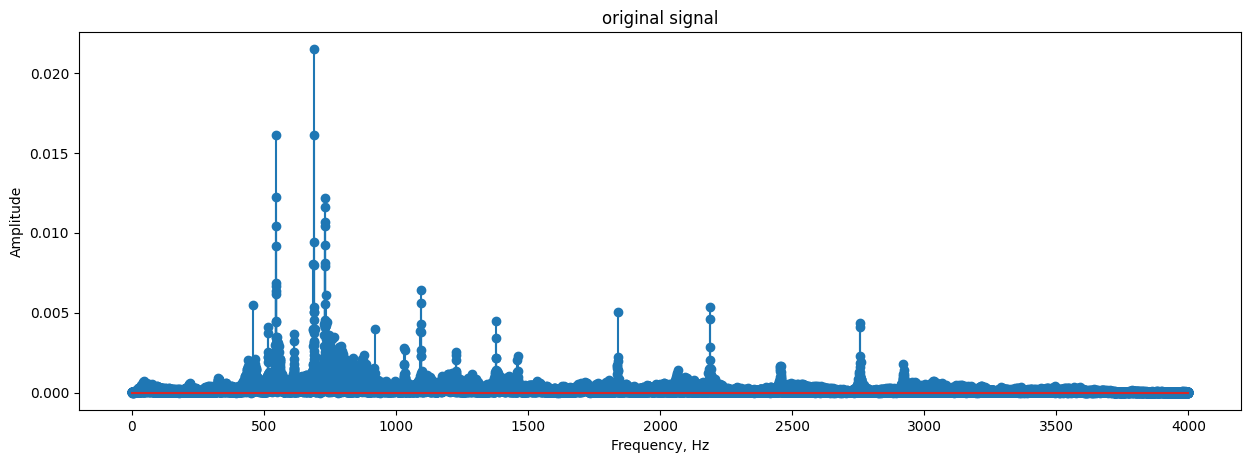

In [217]:
spectra(audio_8, sample_rate=8000, duration=round(audio_8_duration), plot_spectra=True, plot_input=True, title='original signal')

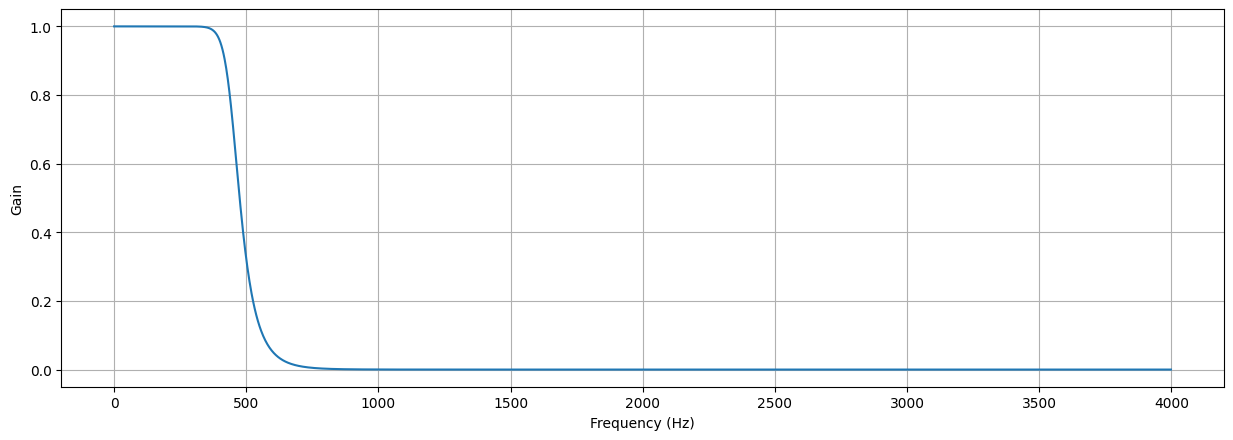

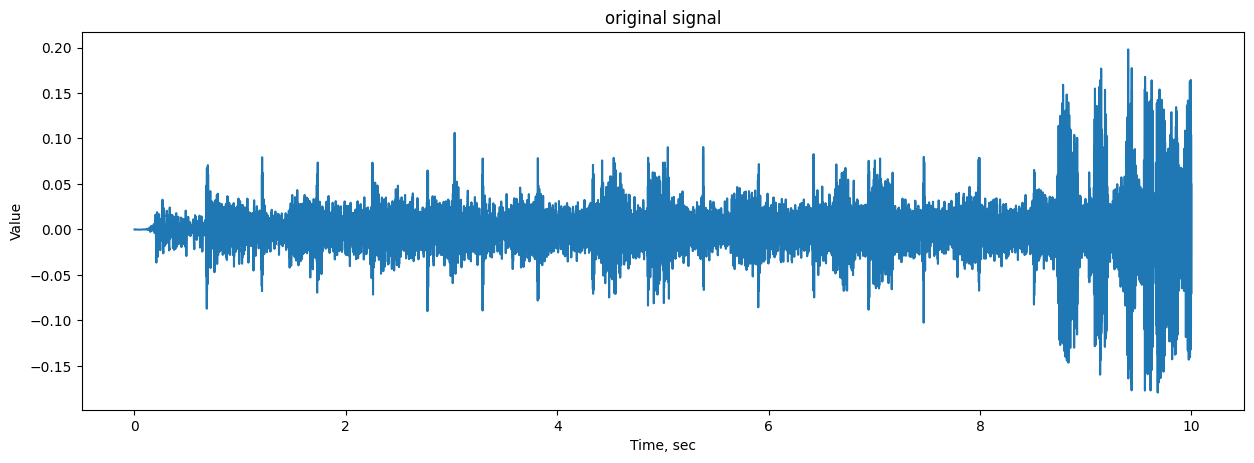

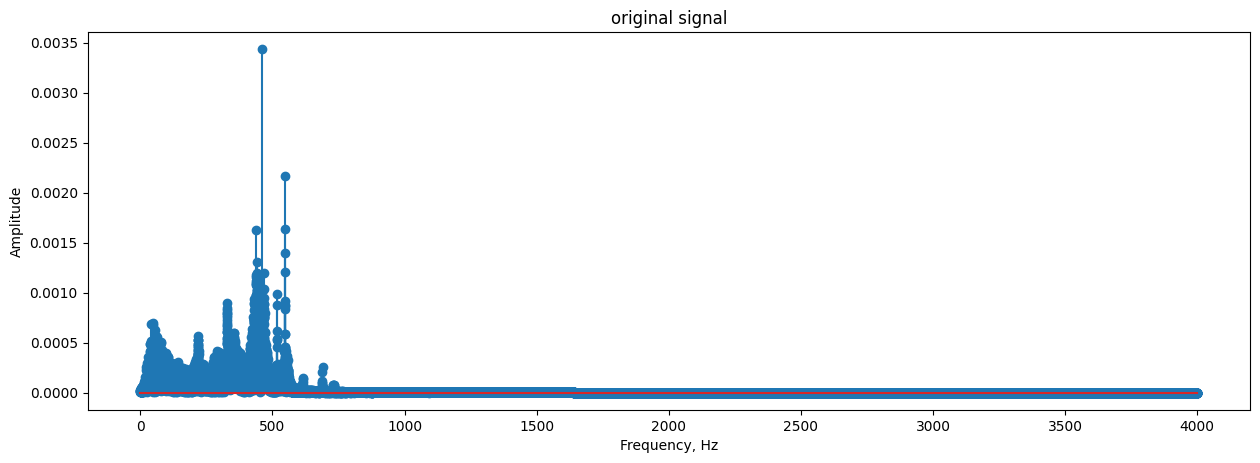

In [221]:
# до 450 Гц
cut = 450

b, a = butter_filter(cut, 8000, order=10, btype='lp')
plot_filter(b, a, 8000)
y = lfilter(b, a, audio_8)

spectra(y, sample_rate=8000, duration=round(audio_8_duration), plot_spectra=True, plot_input=True, title='original signal')

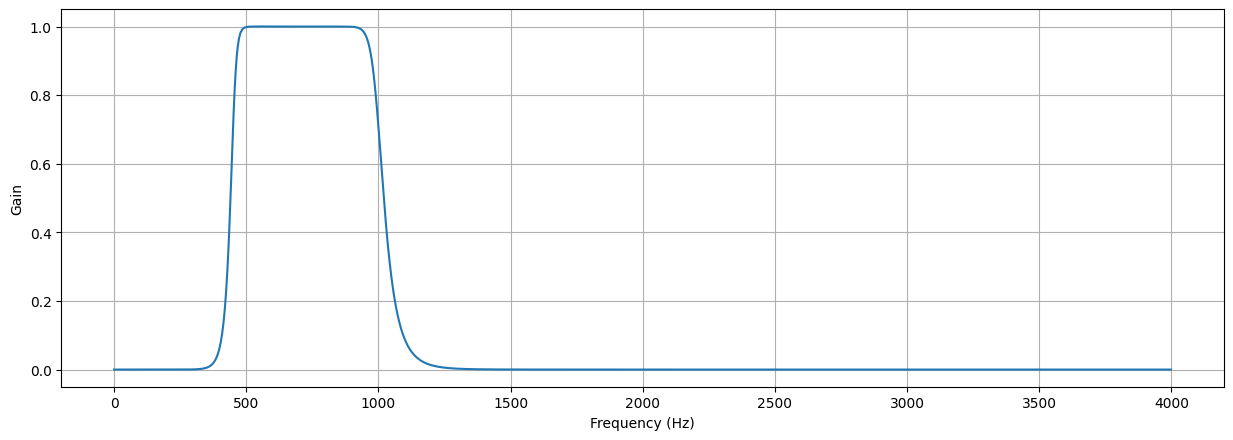

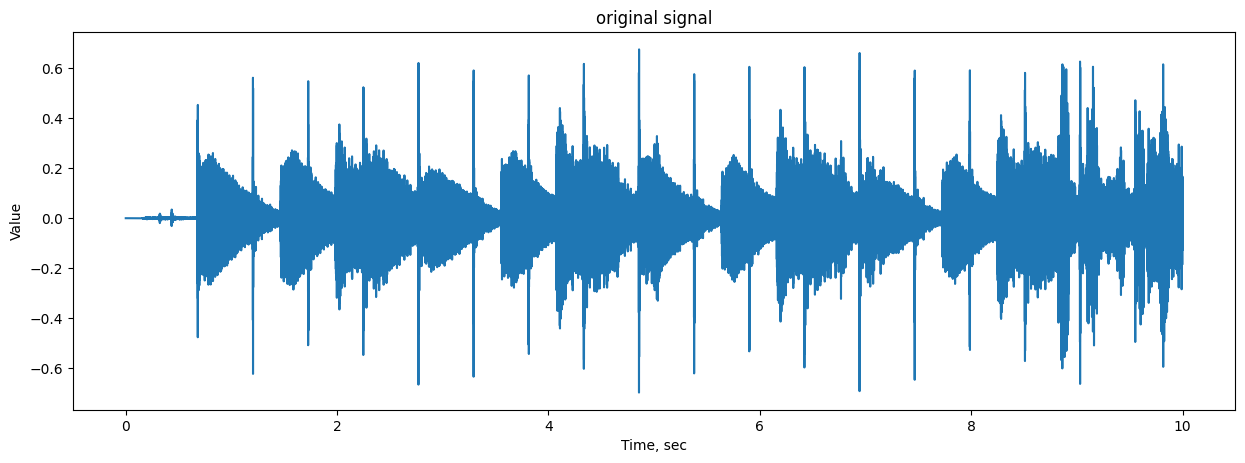

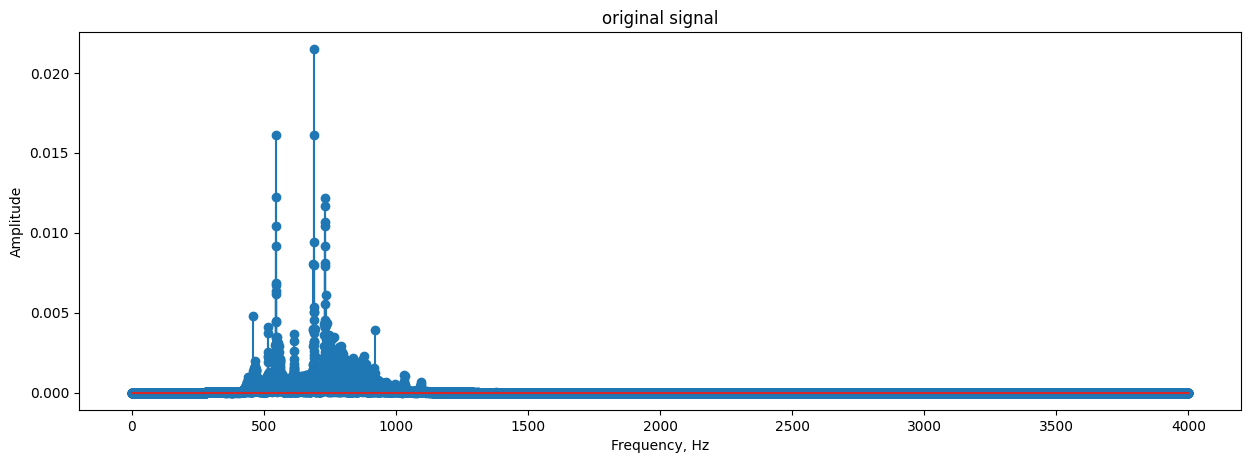

In [229]:
# від 450 Гц до 1 кГц
highcut = 1000
lowcut = 450

b, a = butter_bund_filter(lowcut, highcut, 8000, order=10, btype='band')
plot_filter(b, a, 8000)
y = lfilter(b, a, audio_8)

spectra(y, sample_rate=8000, duration=round(audio_8_duration), plot_spectra=True, plot_input=True, title='original signal')

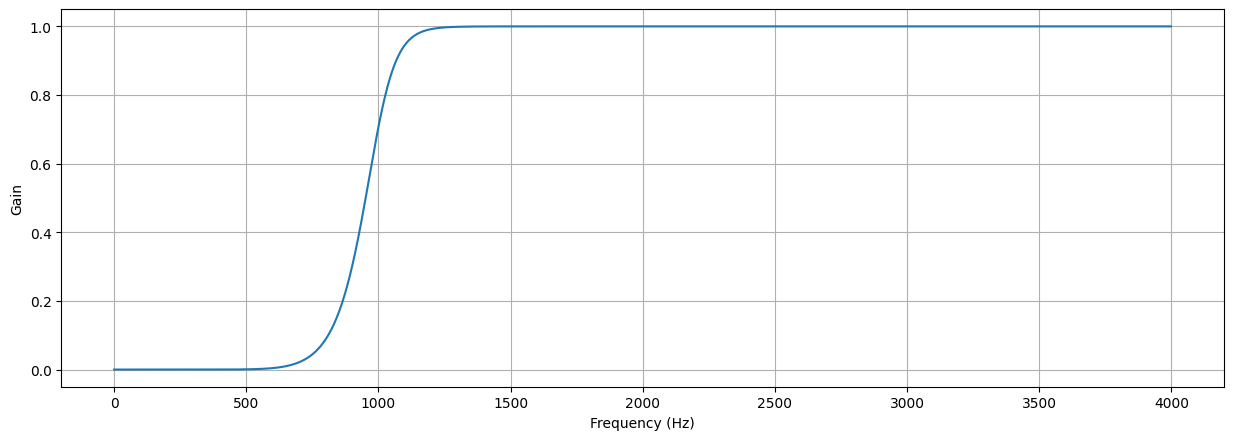

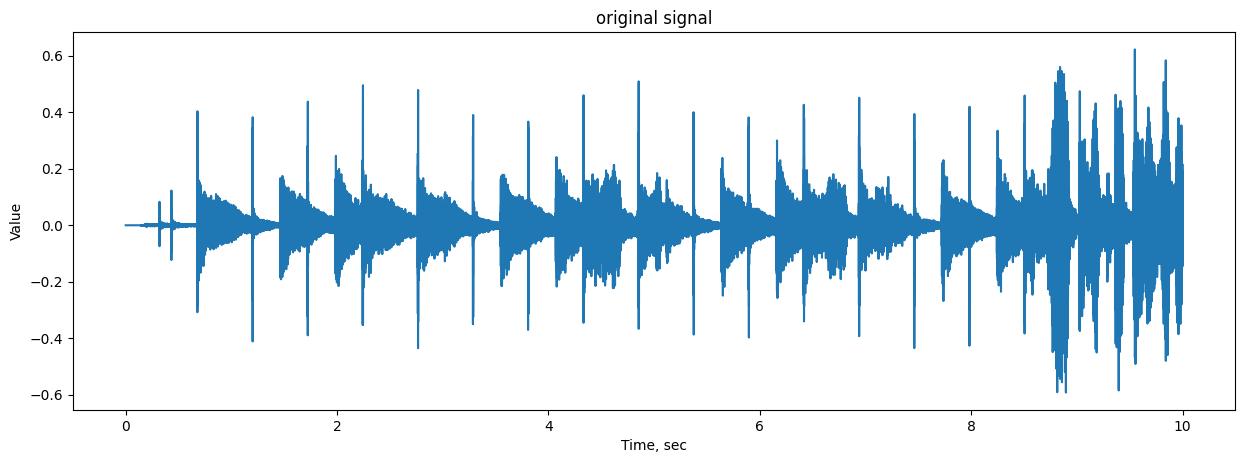

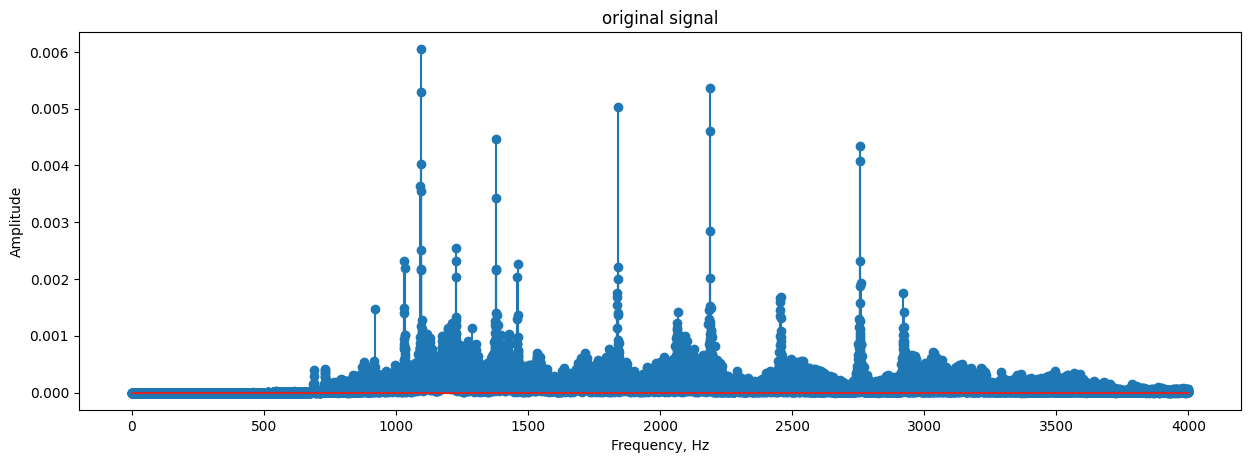

In [228]:
# від 1кГц
cut = 1000

b, a = butter_filter(cut, 8000, order=10, btype='hp')
plot_filter(b, a, 8000)
y = lfilter(b, a, audio_8)

spectra(y, sample_rate=8000, duration=round(audio_8_duration), plot_spectra=True, plot_input=True, title='original signal')